<a href="https://colab.research.google.com/github/rodrigorosalvos/Goodreads_Books/blob/main/Goodreads_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resumo do Projeto
Este projeto tem como objetivo a análise de um dataset sobre livros, disponível em [Kaggle](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks). Foram realizadas etapas de exploração e tratamento dos dados, garantindo maior consistência e qualidade para a análise. Em seguida, utilizei técnicas de visualização por meio de gráficos, a fim de compreender melhor o comportamento das variáveis e extrair insights relevantes a respeito do conjunto de dados.

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rodrigorosalvos
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks


100%|██████████| 622k/622k [00:00<00:00, 491MB/s]

In [5]:
import pandas as pd

In [11]:
df = pd.read_csv('/content/goodreadsbooks/books.csv', sep=',', on_bad_lines='skip')

In [12]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [25]:
#Traduzindo os nomes das colunas
df = df.rename(columns={
    'bookID': 'ID_do_Livro',
    'title': 'Titulo',
    'authors': 'Autores',
    'average_rating': 'Avaliacao_Media',
    'isbn': 'ISBN',
    'isbn13': 'ISBN13',
    'language_code': 'Codigo_do_Idioma',
    ' num_pages': 'Numero_de_Paginas',
    'ratings_count': 'Contagem_de_Avaliacoes',
    'text_reviews_count': 'Contagem_de_Resenhas_de_Texto',
    'publication_date': 'Data_de_Publicacao',
    'publisher': 'Editora'
})

df.head()

,ID_do_Livro,Titulo,Autores,Avaliacao_Media,ISBN,ISBN13,Codigo_do_Idioma,num_pages,Contagem_de_Avaliacoes,Contagem_de_Resenhas_de_Texto,Data_de_Publicacao,Editora
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [41]:
#Transformando o tipo de dado de data_depublicacao para o tipo data
df['Data_de_Publicacao'] = pd.to_datetime(df['Data_de_Publicacao'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID_do_Livro                    11123 non-null  int64         
 1   Titulo                         11123 non-null  object        
 2   Autores                        11123 non-null  object        
 3   Avaliacao_Media                11123 non-null  float64       
 4   ISBN                           11123 non-null  object        
 5   ISBN13                         11123 non-null  int64         
 6   Codigo_do_Idioma               11123 non-null  object        
 7     num_pages                    11123 non-null  int64         
 8   Contagem_de_Avaliacoes         11123 non-null  int64         
 9   Contagem_de_Resenhas_de_Texto  11123 non-null  int64         
 10  Data_de_Publicacao             11121 non-null  datetime64[ns]
 11  Editora        

None

In [36]:
df.describe()

,ID_do_Livro,Avaliacao_Media,ISBN13,num_pages,Contagem_de_Avaliacoes,Contagem_de_Resenhas_de_Texto
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Padronizando um tema geral para os gráficos
sns.set_theme(style='darkgrid')

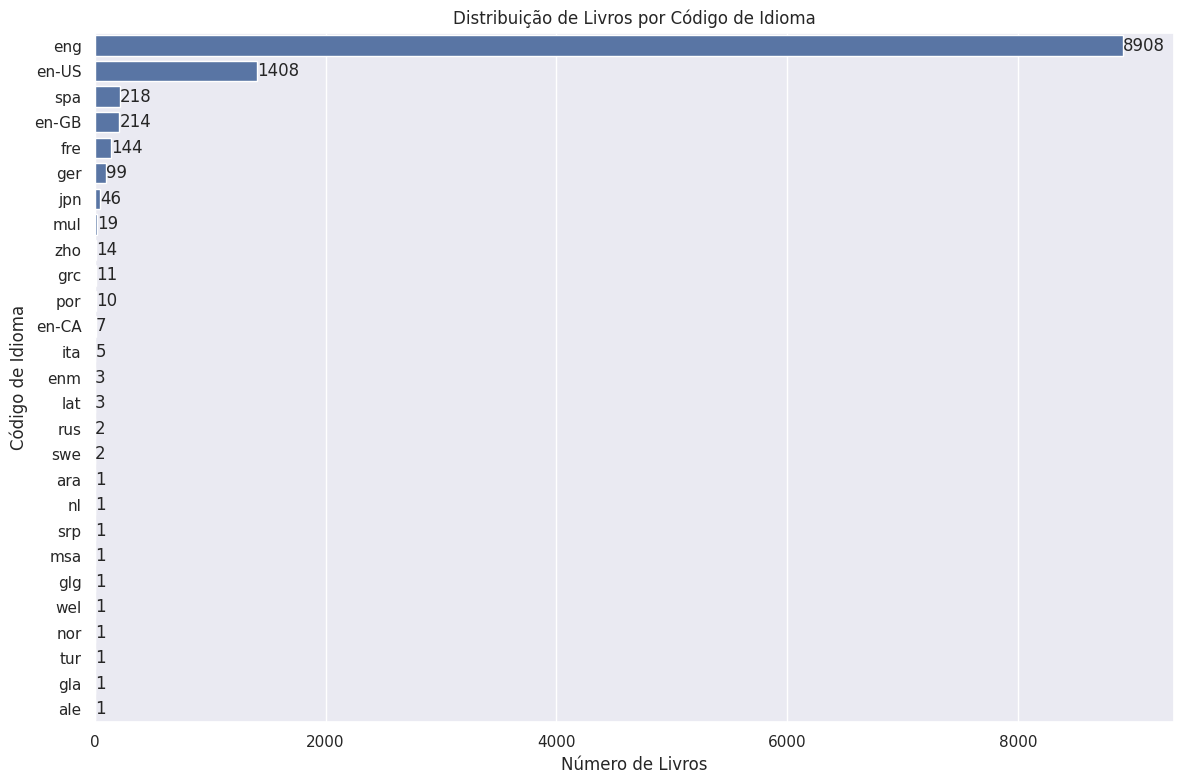

In [27]:
#Gráfico de barras horizontais da Distribuição de Livros por Código de Idioma
language_counts = df['Codigo_do_Idioma'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=language_counts.values, y=language_counts.index)
plt.title('Distribuição de Livros por Código de Idioma')
plt.xlabel('Número de Livros')
plt.ylabel('Código de Idioma')

for index, value in enumerate(language_counts.values):
    ax.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()

In [77]:
#Padronizando os valores da coluna Codigo_do_Idioma que são, na verdade, inglês
df['Codigo_do_Idioma'] = df['Codigo_do_Idioma'].replace(['en-US', 'en-GB', 'en-CA', 'enm'], 'eng')
display(df['Codigo_do_Idioma'].value_counts())

,count
Codigo_do_Idioma,
eng,10540
spa,218
fre,144
ger,99
jpn,46
mul,19
zho,14
grc,11
por,10


In [78]:
#Traduzindo os códigos da coluna Codigo_do_Idioma
language_map = {
    'eng': 'Inglês',
    'spa': 'Espanhol',
    'fre': 'Francês',
    'ger': 'Alemão',
    'jpn': 'Japonês',
    'mul': 'Vários idiomas',
    'zho': 'Chinês',
    'grc': 'Grego Antigo',
    'por': 'Português',
    'ita': 'Italiano',
    'lat': 'Latim',
    'rus': 'Russo',
    'swe': 'Sueco',
    'ara': 'Árabe',
    'nl': 'Holandês',
    'srp': 'Sérvio',
    'msa': 'Malaio',
    'glg': 'Galego',
    'wel': 'Galês',
    'nor': 'Norueguês',
    'tur': 'Turco',
    'gla': 'Gaélico Escocês',
    'ale': 'Aleúte'
}

# Replace language codes with full names
df['Codigo_do_Idioma'] = df['Codigo_do_Idioma'].replace(language_map)

# Display the updated value counts
display(df['Codigo_do_Idioma'].value_counts())

,count
Codigo_do_Idioma,
Inglês,10540
Espanhol,218
Francês,144
Alemão,99
Japonês,46
Vários idiomas,19
Chinês,14
Grego Antigo,11
Português,10


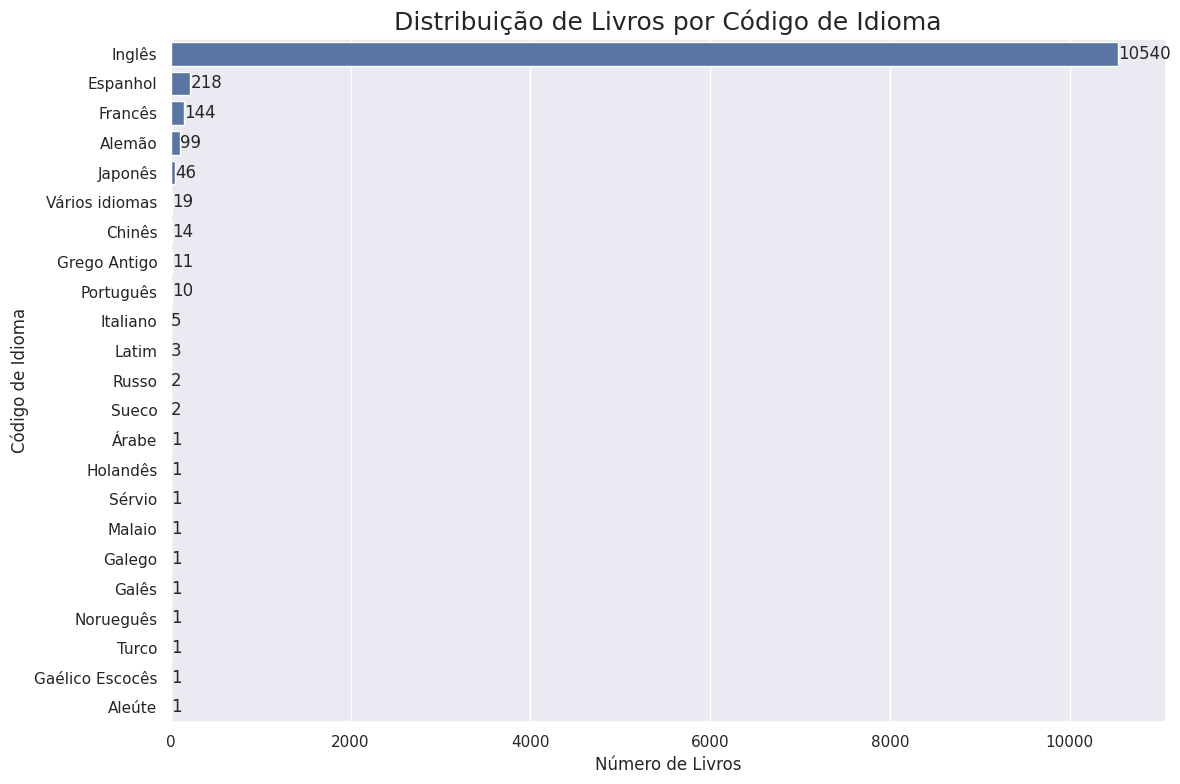

In [81]:
#Refazendo o Gráfico de barras horizontais da Distribuição de Livros por Código de Idioma
language_counts = df['Codigo_do_Idioma'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=language_counts.values, y=language_counts.index)
plt.title('Distribuição de Livros por Código de Idioma', fontsize=18)
plt.xlabel('Número de Livros')
plt.ylabel('Código de Idioma')

for index, value in enumerate(language_counts.values):
    ax.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()

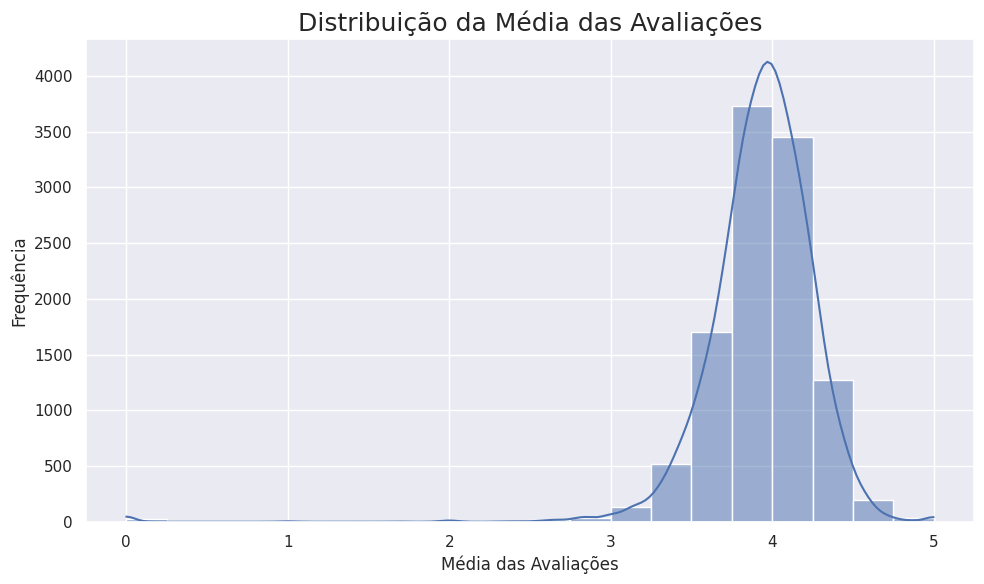

In [82]:
#Gráfico de Distribuição da Média das Avaliações
plt.figure(figsize=(10, 6))
sns.histplot(df['Avaliacao_Media'], bins=20, kde=True)
plt.title('Distribuição da Média das Avaliações', fontsize=18)
plt.xlabel('Média das Avaliações')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

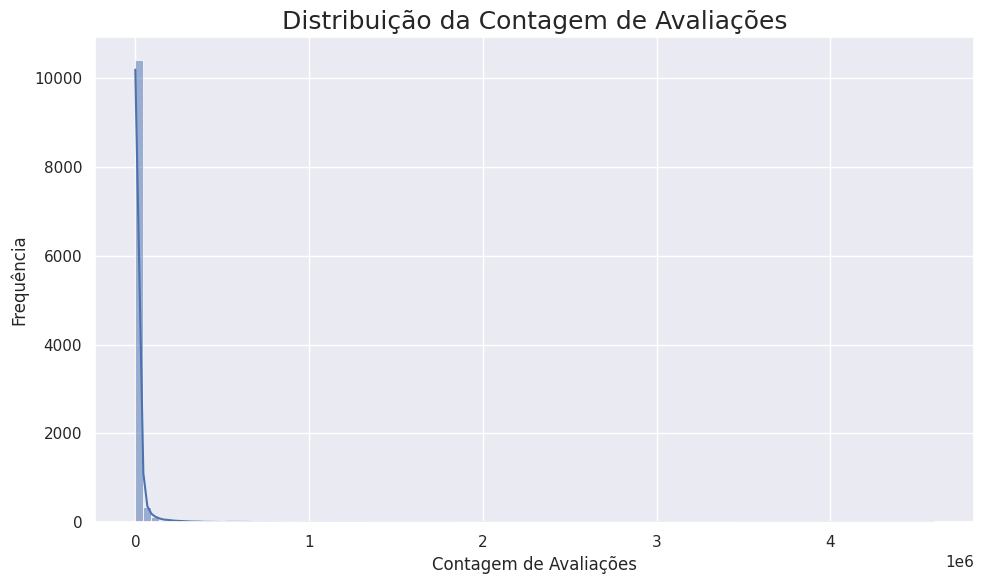

In [83]:
#Gráfico de Distribuição da Contagem de Avaliações
plt.figure(figsize=(10, 6))
sns.histplot(df['Contagem_de_Avaliacoes'], bins=100, kde=True)
plt.title('Distribuição da Contagem de Avaliações', fontsize=18)
plt.xlabel('Contagem de Avaliações')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [40]:
#Tabela dos Top 20 Livros (com pelo menos 50 avaliações)
filtered_df = df[df['Contagem_de_Avaliacoes'] > 50]

top_books_table = filtered_df.sort_values(by='Avaliacao_Media', ascending=False).head(20)

top_books_table = top_books_table[['Titulo', 'Autores', 'Avaliacao_Media', 'Data_de_Publicacao']]

display(top_books_table.style.hide(axis="index"))

Titulo,Autores,Avaliacao_Media,Data_de_Publicacao
The Complete Calvin and Hobbes,Bill Watterson,4.820000,9/6/2005
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPré,4.780000,9/13/2004
It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.760000,9/1/1996
Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.730000,9/12/2005
Early Color,Saul Leiter/Martin Harrison,4.730000,1/15/2006
Elliott Erwitt: Snaps,Murray Sayle/Charles Flowers/Elliott Erwitt,4.720000,6/1/2003
Homicidal Psycho Jungle Cat (Calvin and Hobbes #9),Bill Watterson,4.720000,9/6/1994
Calvin and Hobbes: Sunday Pages 1985-1995: An Exhibition Catalogue,Bill Watterson,4.710000,9/17/2001
Study Bible: NIV,Anonymous,4.700000,10/1/2002
The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.700000,10/17/2004


In [51]:
#Tabela dos Livros melhores avaliados de cada ano (com pelo menos 50 avaliações)
filtered_df = df[df['Contagem_de_Avaliacoes'] >= 50].copy()

filtered_df['Ano_de_Publicacao'] = filtered_df['Data_de_Publicacao'].dt.year.astype('Int64')

filtered_df_sorted = filtered_df.sort_values(by=['Ano_de_Publicacao', 'Avaliacao_Media'], ascending=[False, False])

best_books_per_year = filtered_df_sorted.groupby('Ano_de_Publicacao').first().reset_index()

display(best_books_per_year[['Ano_de_Publicacao', 'Titulo', 'Autores', 'Avaliacao_Media']].style.hide(axis="index"))

Ano_de_Publicacao,Titulo,Autores,Avaliacao_Media
1900,Consider the Lilies,Iain Crichton Smith/Isobel Murray,3.880000
1913,On Duties (De Officiis),Marcus Tullius Cicero/Walter Miller,3.960000
1914,Agricola / Germania / Dialogue on Oratory,Tacitus/Maurice Hutton/Robert Maxwell Ogilvie/E.H. Warmington/William Peterson/Michael Winterbottom,3.950000
1919,History of the Peloponnesian War: Bk. 1-2,Thucydides/C.F. Smith,4.320000
1925,The Great Gatsby,F. Scott Fitzgerald,3.910000
1928,Discourses Books 3-4. The Enchiridion (Loeb Classical Library #218),Epictetus/William A. Oldfather,4.340000
1929,The Art of Love and Other Poems,Ovid/J.H. Mozley/G.P. Goold,4.020000
1940,For Whom the Bell Tolls,Ernest Hemingway,3.970000
1943,Betsy and Tacy Go Downtown (Betsy-Tacy #4),Maud Hart Lovelace/Lois Lenski,4.210000
1947,McElligot's Pool,Dr. Seuss,4.060000


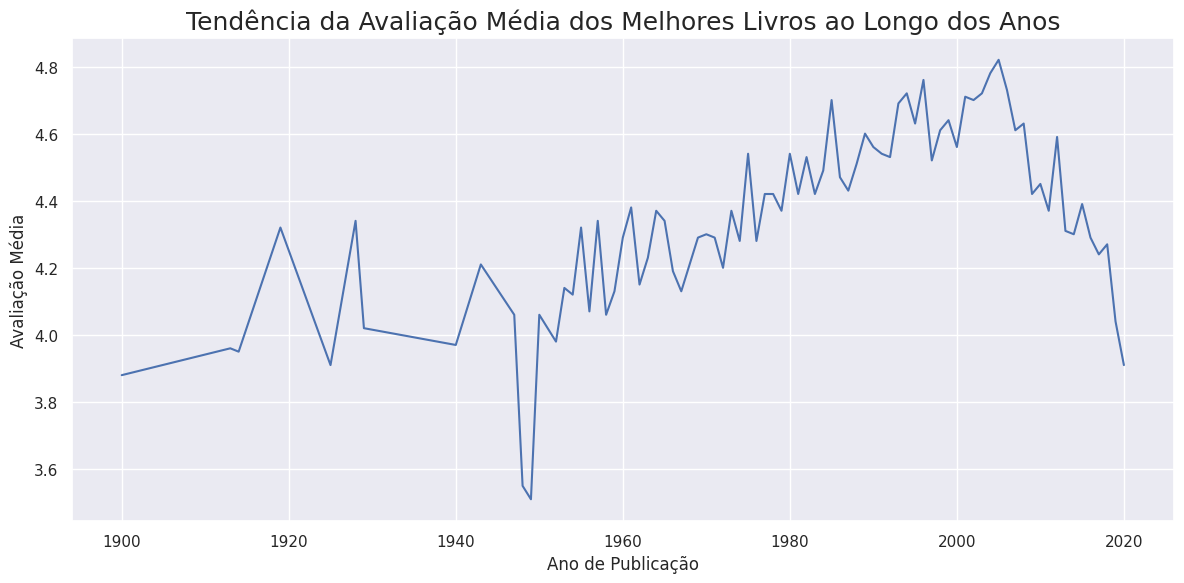

In [84]:
#Gráfico da Tendência da Avaliação Média dos Melhores Livros ao Longo dos Anos
plt.figure(figsize=(12, 6))
sns.lineplot(x='Ano_de_Publicacao', y='Avaliacao_Media', data=best_books_per_year)
plt.title('Tendência da Avaliação Média dos Melhores Livros ao Longo dos Anos', fontsize=18)
plt.xlabel('Ano de Publicação')
plt.ylabel('Avaliação Média')
plt.tight_layout()
plt.show()

In [87]:
#Recriando o mesmo gráfico no plotly para mais interatividade com o mesmo
import plotly.express as px

fig = px.line(best_books_per_year, x='Ano_de_Publicacao', y='Avaliacao_Media',
              title='Tendência da Avaliação Média dos Melhores Livros ao Longo dos Anos')
fig.update_layout(
    xaxis_title='Ano de Publicação',
    yaxis_title='Avaliação Média')

fig.show()

/tmp/ipython-input-3694025812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=author_counts.values, y=author_counts.index, palette='mako')


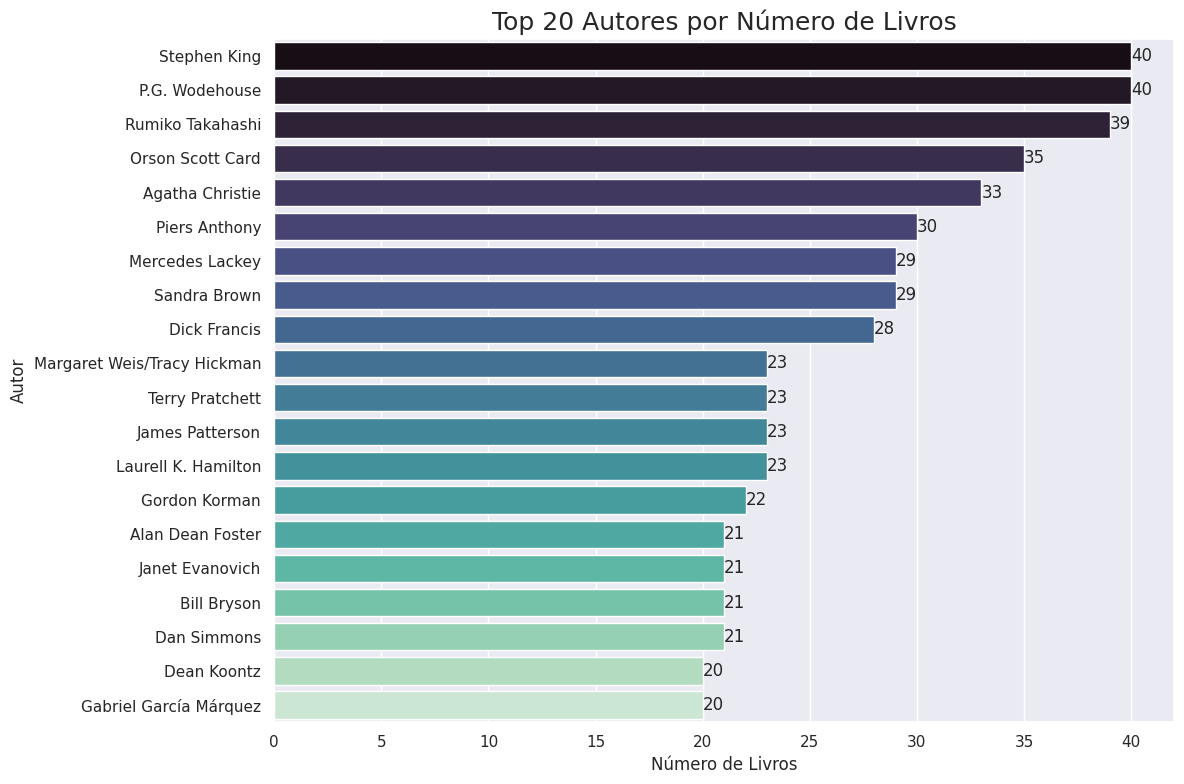

In [85]:
#Gráfico dos Top 20 Autores por Número de Livros
author_counts = df['Autores'].value_counts().head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=author_counts.values, y=author_counts.index, palette='mako')
plt.title('Top 20 Autores por Número de Livros', fontsize=18)
plt.xlabel('Número de Livros')
plt.ylabel('Autor')

for index, value in enumerate(author_counts.values):
    ax.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2413721930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='mako')


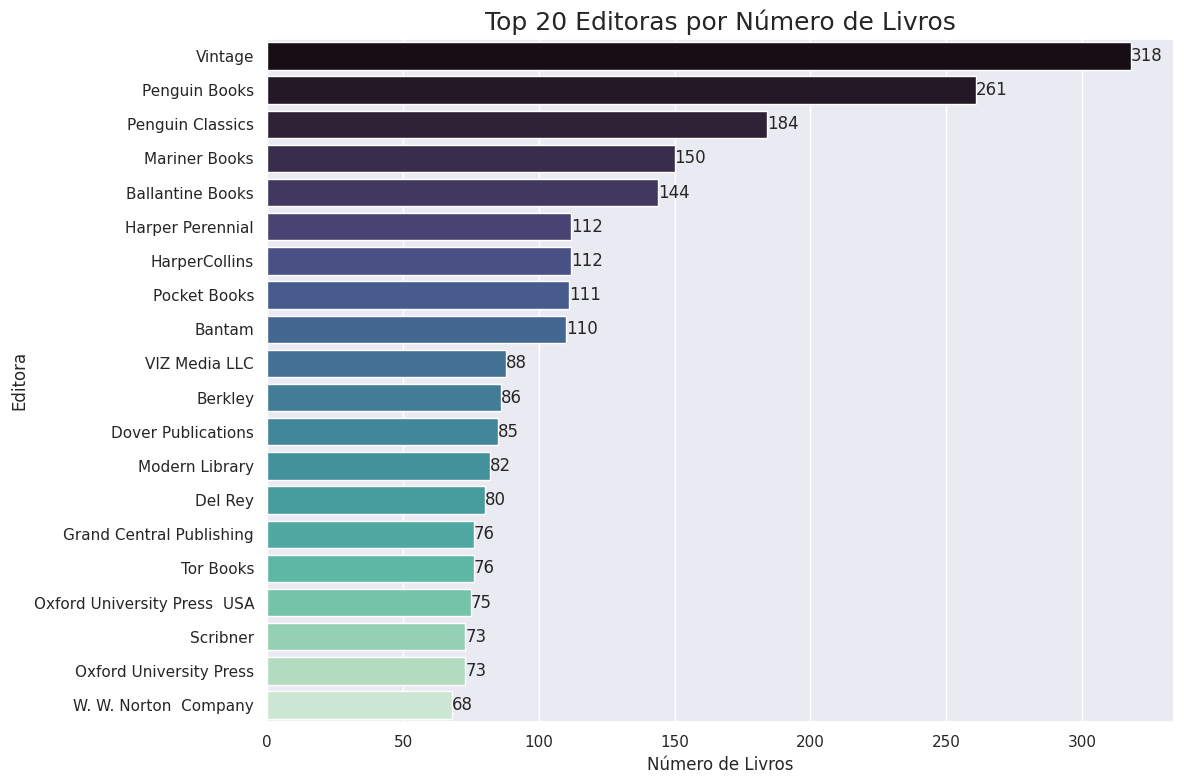

In [86]:
#Gráfico das Top 20 Editoras por Número de Livros
publisher_counts = df['Editora'].value_counts().head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='mako')
plt.title('Top 20 Editoras por Número de Livros', fontsize=18)
plt.xlabel('Número de Livros')
plt.ylabel('Editora')

for index, value in enumerate(publisher_counts.values):
    ax.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()